In [1]:
import numpy as np
import time
from math import sqrt, pi, exp
import functools
import scipy
import matplotlib.pylab as pl
from varname import nameof


from utils.preconditioners import *
from utils.algorithms import *
from utils.functions import *

### Test case "Gaussian"

In [2]:
# 
d = 2

# test case "Gaussian"
xmin = -2
xmax = 2
ymin= -2
ymax= 2

#m = np.asarray([0,0])
#K = np.diag([1,1])
#K_inv = np.linalg.inv(K)
#K_det = np.linalg.det(K)

#coe = 1.0 / ((2 * np.pi)**2 * K_det)**0.5
#I = lambda u: np.linalg.multi_dot([u.T,np.linalg.inv(K),u]) # does not work idny
#I = lambda u: coe * np.e ** (-0.5 * (K_inv[0,0]*(u[0]-m[0])**2 \
#                + (K_inv[0,1] + K_inv[1,0])*(u[0]-m[0])*(u[1]-m[1]) + K_inv[1,1]*(u[1]-m[1])**2))


# potential function

y=0
sigNoise = 0.5
sigPrior = 2

G = lambda u: (u[1])**2+(u[0])**2
Phi = lambda u: 0.5/(sigNoise**2)*(G(u)-y)**2 #likelihood

# potential function
I = lambda u: Phi(u) + 0.5/(sigPrior**2)*np.linalg.norm(u,axis=0)**2

# C0MPUTE SIGMA POSTERIOR

K_inv = np.eye(d,d)*sigPrior + np.eye(d,d)*sigNoise
K = np.linalg.solve(K_inv,np.eye(d,d))

(2, 150, 150)


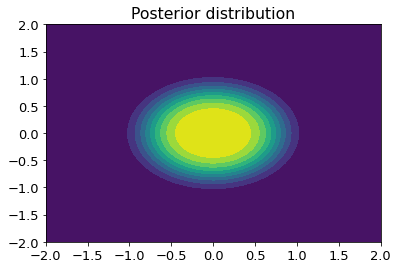

'\nm = np.array([0,0])  # defining the mean of the Gaussian (mX = 0.2, mY=0.6)\ncov = np.array([[0.7, 0.4], [0.4, 0.25]])   # defining the covariance matrix\ncov_inv = K_inv   # inverse of covariance matrix\ncov_det = np.linalg.det(cov)  # determinant of covariance matrix\n# Plotting\nx = np.linspace(-2, 2)\ny = np.linspace(-2, 2)\nX,Y = np.meshgrid(x,y)\ncoe = 1.0 / ((2 * np.pi)**2 * cov_det)**0.5\nZ = coe * np.e ** (-0.5 * (cov_inv[0,0]*(X-m[0])**2 + (cov_inv[0,1] + cov_inv[1,0])*(X-m[0])*(Y-m[1]) + cov_inv[1,1]*(Y-m[1])**2))\nplt.contour(X,Y,Z)\nplt.show()\n'

In [3]:
# plot posterior

u0s = np.linspace(xmin,xmax,150)
u1s = np.linspace(ymin,ymax,150)
U0, U1 = np.meshgrid(u0s,u1s)
U = np.stack((U0,U1))
print(U.shape)


plt.figure()
plt.contourf(U0, U1, np.exp(-I(U)), 10)
plt.title("Posterior distribution")
plt.show()

"""
m = np.array([0,0])  # defining the mean of the Gaussian (mX = 0.2, mY=0.6)
cov = np.array([[0.7, 0.4], [0.4, 0.25]])   # defining the covariance matrix
cov_inv = K_inv   # inverse of covariance matrix
cov_det = np.linalg.det(cov)  # determinant of covariance matrix
# Plotting
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)
X,Y = np.meshgrid(x,y)
coe = 1.0 / ((2 * np.pi)**2 * cov_det)**0.5
Z = coe * np.e ** (-0.5 * (cov_inv[0,0]*(X-m[0])**2 + (cov_inv[0,1] + cov_inv[1,0])*(X-m[0])*(Y-m[1]) + cov_inv[1,1]*(Y-m[1])**2))
plt.contour(X,Y,Z)
plt.show()
"""

### Try algorithms

In [4]:
# parameters of all the algorithms

J = 20  # number of particles 
N_sim = 100 # number of iterations
d = 2 # dimension
tau = 0.01 # step size
u0 = np.random.normal(0,1.0,(d,J)) # initial position of the particles

# parameters of our algorithm
const = 1.5 


Text(0.5, 1.0, 'Posterior distribution and initialization')

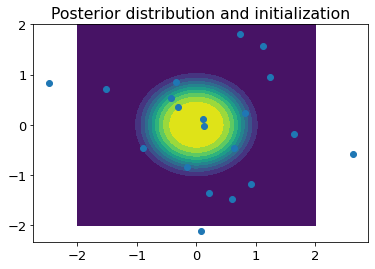

In [5]:

plt.figure()
plt.contourf(U0, U1, np.exp(-I(U)), 10)
plt.scatter(u0[0],u0[1])
plt.title("Posterior distribution and initialization")

In [6]:
start_time = time.time()

us_list_ULA = run_ULA(I, N_sim, u0, tau)

print(f"ULA: {time.time()-start_time} seconds")

ULA: 0.8966739177703857 seconds


In [7]:
# EKS (ALDI with gradient)

start_time = time.time()

us_list_ALDI = run_ALDI_with_gradient(I, N_sim, u0, tau)

print(f"ALDI with gradient: {time.time()-start_time} seconds")


ALDI with gradient: 0.8853178024291992 seconds


In [8]:
# Non reversible EKS (our algorithm) v2

# parameters of all the algorithms

J = 100  # number of particles 
N_sim = 100 # number of iterations
d = 2 # dimension
tau_ALDINR = 1e-4
u0 = np.random.normal(0,0.5,(2,J)) # initial position of the particles

# parameters of our algorithm
const = 1.5 

start_time = time.time()

us_list_ALDINR, means = run_ALDINR(I, N_sim, u0, tau_ALDINR, const)
    
print(f"ALDI: {time.time()-start_time} seconds")


iter
0
0.21431567792420886
0.21450640353029357
0.21205918988162947


/Users/annakorba/Desktop/square/code_eks/utils/algorithms.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  us_list_ALDINR[:,:,n+1] = us+tau*drift  + np.sqrt(tau)*diff


0.2103984839498134
0.20678843707103686
0.20799506625800232
0.20836664929805515
0.20611678101256883
0.20441063458942674
0.2046841040444378
0.20279531405971868
0.20343841173743468
0.20219285731853892
0.20121202273829816
0.20242349582106428
0.19994059986241164
0.2013267471773486
0.20038864308998564
0.19713714361506982
0.19652867250382644
0.19659168416786077
0.19574538198566024
0.19451717739875019
0.1942558143176367
0.19801723022403336
0.19805685880698262
0.1983945700750749
0.20041388435344748
0.19839684912848027
0.19902147323803596
0.1984742396423619
0.19993726872662826
0.19825487506920542
0.19898364263825546
0.2001238224654573
0.2024693510854484
0.20197618907176487
0.20039988462320069
0.19758233937051256
0.19818945232732765
0.19847618467848974
0.2024716961858957
0.20318618345434195
0.20372574840117952
0.20383036378700492
0.2039638079773785
0.20516898233968003
0.20637628590519305
0.20680757439701172
0.2053110406002642
0.20436621286794954
0.20541537995591397
0.20501724172264513
0.206072774

In [9]:
means[1,N_sim] =  

SyntaxError: invalid syntax (626379739.py, line 1)

In [ ]:
plt.plot(means[1,:])

In [ ]:
# save results

#us_list_ULA.tofile('save_data/ULA.dat')
#us_list_ULA2 = np.fromfile('save_data/ULA.dat', dtype=int)
#us_list_ULA == us_list_ULA2

#us_list_ALDINR.tofile('save_data/ALDINR_5000.dat')
#us_list_ALDINR2 = np.fromfile('save_data/ALDINR_5000.dat', dtype=int)
#us_list_ALDINR == us_list_ALDINR2

In [ ]:
# plot results

name = nameof(us_list_ULA).lstrip('us_list')
plot_results(I, us_list_ULA, name)

name = nameof(us_list_ALDI).lstrip('us_list')
plot_results(I, us_list_ALDI, name)
    
name = nameof(us_list_ALDINR).lstrip('us_list')
plot_results(I, us_list_ALDINR, name)


In [ ]:
us_list_ALDINR[0,:,N_burnin:].flatten()

In [ ]:
np.max(us_list_ALDINR[0,:,N_burnin:].flatten())

In [ ]:
np.min(us_list_ALDINR[0,:,N_burnin:].flatten())

In [ ]:
np.max(us_list_ALDI3[0,:,N_burnin:].flatten())

In [ ]:
np.min(us_list_ALDI3[0,:,N_burnin:].flatten())

In [ ]:
plt.hist(us_list_ALDINR[0,:,N_burnin:].flatten())

In [ ]:
plt.hist(us_list_ALDI3[0,:,N_burnin:].flatten())

In [ ]:
us_list_ALDI3[0,:,N_burnin:].flatten()

In [ ]:
plt.hist2d(us_list_ALDINR[0,:,N_burnin:].flatten(),us_list_ALDINR[1,:,N_burnin:].flatten(),bins=200)

In [ ]:
plt.hist2d(us_list_ALDI3[0,:,N_burnin:].flatten(),us_list_ALDI3[1,:,N_burnin:].flatten(),bins=200)

In [ ]:
plt.plot(dist_M)
plt.figure()
plt.plot(dist_C)

In [ ]:
dist_M[1]